"""
Annotation_validation.ipynb

This Jupyter Notebook uses a pre-trained model to:
- Validate the performance of the labeled data.
- Measure model performance metrics like accuracy, precision, recall, and F1-score.
"""

In [ ]:
#Load dataset and define the labels
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from transformers import pipeline

# Load dataset
data_path = "data/final_dataset.csv"
data = pd.read_csv(data_path)

# Extract queries and true labels
queries = data["query"]
true_labels = data["final_label"]
print(true_labels.unique())

# Define candidate labels
candidate_labels = ["Inquiry", "Request for action", "Complaint", "Technical Issue", "Praise", "Unclear"]


['Inquiry' 'Request for action' 'Unclear' 'Technical Issue' 'Praise'
 'Complaint']


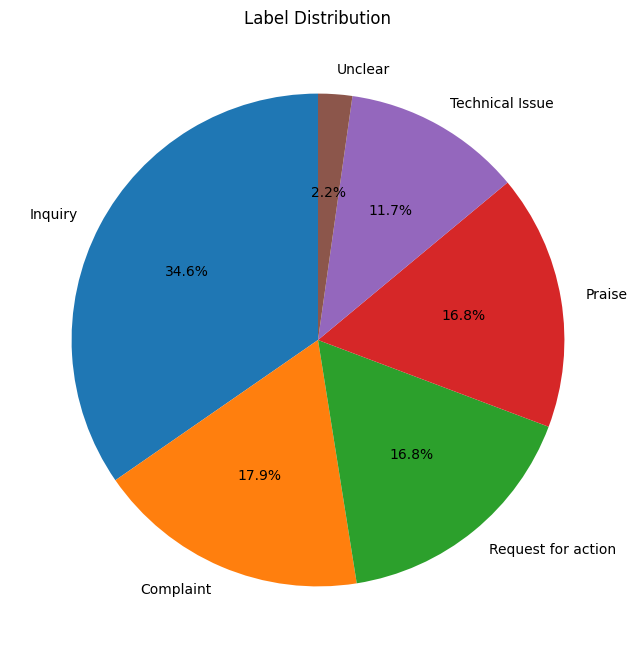

In [ ]:
# Pie chart for label distribution
label_counts = data["final_label"].value_counts()
label_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), title="Label Distribution")
plt.ylabel('')
plt.savefig("images/label_distribution_pie_chart.png")
plt.show()

In [ ]:
classifier = pipeline("zero-shot-classification", model="roberta-large-mnli")

# Classification function
def classify_query(query):
    result = classifier(query, candidate_labels)
    return result["labels"][0]

data['predicted_label'] = queries.apply(classify_query)

# Save predictions to CSV
data.to_csv('Predicted_labels.csv', index=False)

# Evaluate model predictions
accuracy = accuracy_score(data["final_label"], data['predicted_label'])
print(f"Accuracy : {accuracy:.2f}")

# Classification report
report = classification_report(data["final_label"], data['predicted_label'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Save classification report
report_df.to_csv("data/classification_report.csv", index=True)

# Per-label score analysis
per_label_scores = report_df.loc[candidate_labels, ["precision", "recall", "f1-score"]]
print(f"Per-label scores:")
print(per_label_scores)

# Save per-label scores to CSV
per_label_scores.to_csv("data/per_label_scores.csv", index=True)


Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Accuracy : 0.53
Per-label scores:
                    precision    recall  f1-score
Inquiry              0.787879  0.419355  0.547368
Request for action   0.437500  0.933333  0.595745
Complaint            0.833333  0.156250  0.263158
Technical Issue      0.625000  0.476190  0.540541
Praise               1.000000  0.866667  0.928571
Unclear              0.000000  0.000000  0.000000


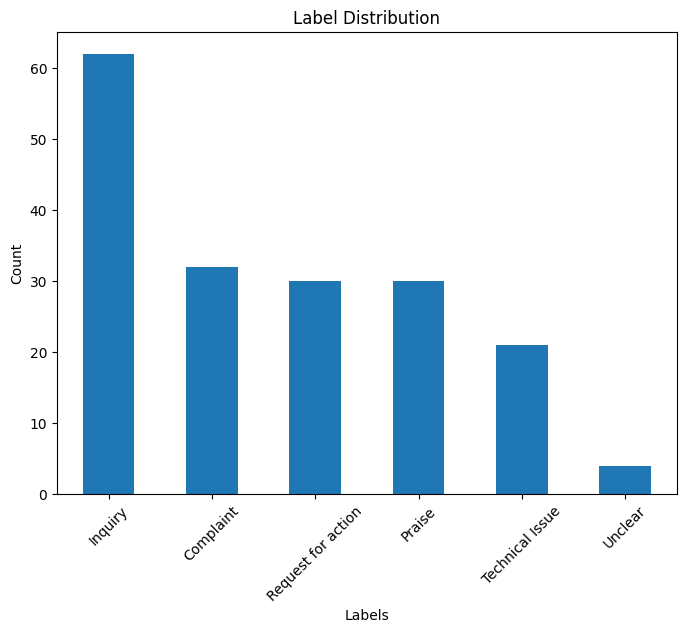

In [ ]:
label_counts.plot(kind='bar', figsize=(8, 6), title="Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=45)
#plt.savefig("label_distribution_bar_chart.png")
plt.show()

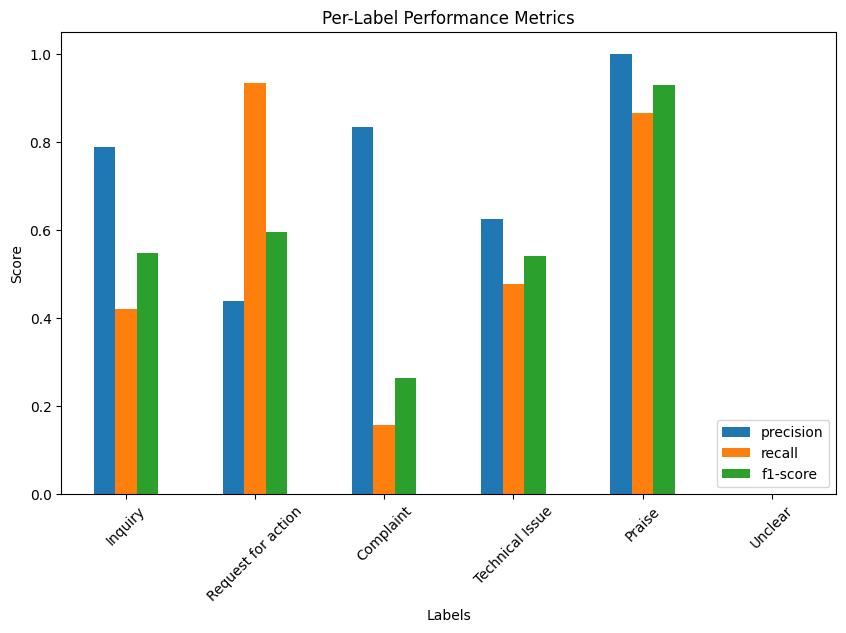

In [ ]:
metrics = ["precision", "recall", "f1-score"]

report_df.loc[candidate_labels, metrics].plot(kind='bar', figsize=(10, 6))
plt.title(f"Per-Label Performance Metrics")
plt.ylabel("Score")
plt.xlabel("Labels")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.savefig("images/per_label_metrics_bar.png")
plt.show()